In [1]:
import ee
import geemap
import pandas as pd
import dtale
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedKFold,train_test_split
from sklearn.preprocessing import MinMaxScaler,PowerTransformer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error,explained_variance_score,mean_absolute_percentage_error
import glob
import dask.dataframe as dd
from tpot import TPOTRegressor
import xarray as xr
from scipy import stats
from sklearn.svm import SVR
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression,ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import plot_partial_dependence
from warnings import filterwarnings
filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import plotly.express as px
import chart_studio.plotly as py
import folium
from folium.plugins import HeatMap
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot
init_notebook_mode(connected = True)
from folium.plugins import FastMarkerCluster
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import os
from sklearn.inspection import permutation_importance


/Users/mdnhuda/opt/anaconda3/lib/python3.8/site-packages/tpot/builtins/__init__.py:36: UserWarning:




In [13]:
df= pd.read_csv('LandSat8_S5_Los_Angeles_July_5000_Points.csv')
dtale.show(df)

In [14]:
X=df.drop('NO2_column_number_density',axis=1).values
y=df['NO2_column_number_density'].values
dtale.show(X)

In [16]:
X=scaler.fit_transform(X)
dtale.show(X)

In [20]:
y=scaler.fit_transform(y.reshape(-1, 1))
dtale.show(y)

In [21]:
X=df.drop('NO2_column_number_density',axis=1).values
y=df['NO2_column_number_density'].values
scaler=MinMaxScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [22]:
df_San_Francisco= pd.read_csv('LandSat8_S5_San_Francisco_July_Multi_5000_Points.csv')
X_San_Francisco=df_San_Francisco.drop('NO2_column_number_density',axis=1).values
y_San_Francisco=df_San_Francisco['NO2_column_number_density'].values

X_train_San_Francisco, X_test_San_Francisco, y_train_San_Francisco, y_test_San_Francisco = train_test_split(X_San_Francisco, y_San_Francisco, test_size=0.30, random_state=42)
scaler=MinMaxScaler()
X_train_San_Francisco=scaler.fit_transform(X_train_San_Francisco)
X_test_San_Francisco=scaler.transform(X_test_San_Francisco)

In [27]:
df_Texas= pd.read_csv('LandSat8_S5_Texas_July_Multi_5000_Points.csv')
X_Texas=df_Texas.drop('NO2_column_number_density',axis=1).values
y_Texas=df_Texas['NO2_column_number_density'].values

X_train_Texas, X_test_Texas, y_train_Texas, y_test_Texas = train_test_split(X_Texas, y_Texas, test_size=0.30, random_state=42)
scaler=MinMaxScaler()
X_train_Texas=scaler.fit_transform(X_train_Texas)
X_test_Texas=scaler.transform(X_test_Texas)

In [30]:
df_North_Dakota= pd.read_csv('LandSat8_S5_North_Dakota_July_Multi_5000_Points.csv')
X_North_Dakota=df_North_Dakota.drop('NO2_column_number_density',axis=1).values
y_North_Dakota=df_North_Dakota['NO2_column_number_density'].values

X_train_North_Dakota, X_test_North_Dakota, y_train_North_Dakota, y_test_North_Dakota = train_test_split(X_North_Dakota, y_North_Dakota, test_size=0.30, random_state=42)
scaler=MinMaxScaler()
X_train_North_Dakota=scaler.fit_transform(X_train_North_Dakota)
X_test_North_Dakota=scaler.transform(X_test_North_Dakota)

In [31]:
df_Washington_DC= pd.read_csv('LandSat8_S5_Washington_DC_July_Multi_5000_Points.csv')
X_Washington_DC=df_Washington_DC.drop('NO2_column_number_density',axis=1).values
y_Washington_DC=df_Washington_DC['NO2_column_number_density'].values

X_train_Washington_DC, X_test_Washington_DC, y_train_Washington_DC, y_test_Washington_DC = train_test_split(X_Washington_DC, y_Washington_DC, test_size=0.30, random_state=42)
scaler=MinMaxScaler()
X_train_Washington_DC=scaler.fit_transform(X_train_Washington_DC)
X_test_Washington_DC=scaler.transform(X_test_Washington_DC)

In [22]:
model = GradientBoostingRegressor(alpha=0.85, learning_rate=0.5, loss='lad', max_depth=15, max_features=0.9500000000000001,
                                min_samples_leaf=12, min_samples_split=7, n_estimators=100, subsample=0.6500000000000001)
# fit model
model.fit(X_train,y_train)
# make a prediction
prediction=model.predict(X_test)
print('Training Accuracy : %.3f'% model.score(X_train,y_train))

print('Test Accuracy : %.3f'%model.score(X_test,y_test))

Training Accuracy : 0.742
Test Accuracy : 0.301


Mean Squared Error = 1.3877349582750922e-11
Mean absolute percentage error = 0.024249571621313335


Text(0, 0.5, 'NO2_column_number_density')

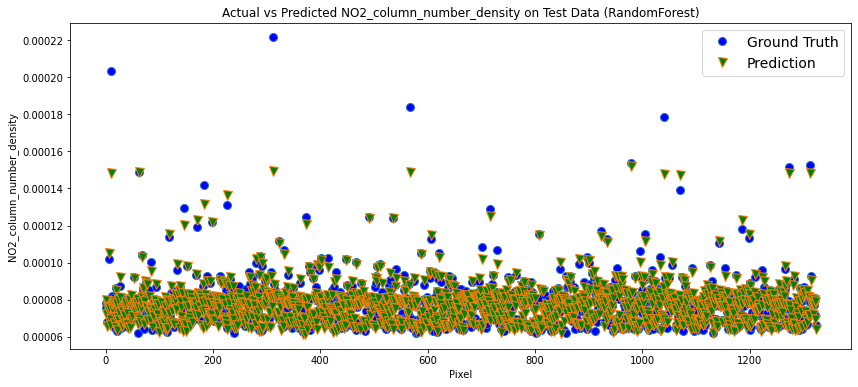

In [18]:
prediction=model.predict(X_test)
MSE=mean_squared_error(y_test,prediction)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test,prediction)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Test Data (RandomForest)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

Mean Squared Error = 4.781411015202925e-10
Mean absolute percentage error = 0.22988679297158937


Text(0, 0.5, 'NO2_column_number_density')

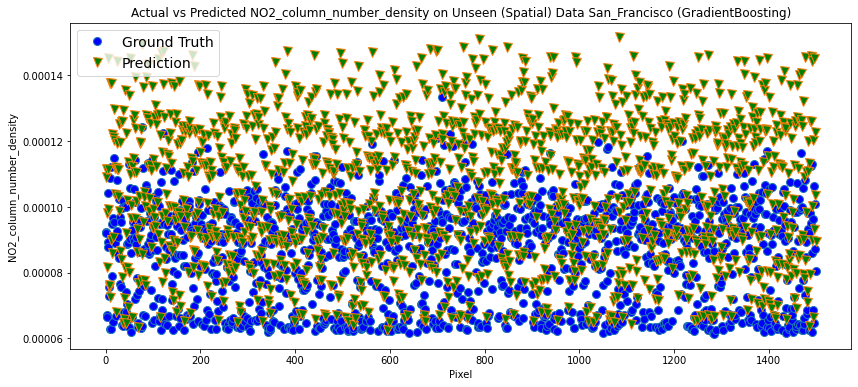

In [29]:
prediction_San_Francisco=model.predict(X_test_San_Francisco)
MSE=mean_squared_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_San_Francisco,prediction_San_Francisco)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_San_Francisco,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_San_Francisco,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data San_Francisco (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

Mean Squared Error = 1.8933946794608371e-10
Mean absolute percentage error = 0.13261486161070896


Text(0, 0.5, 'NO2_column_number_density')

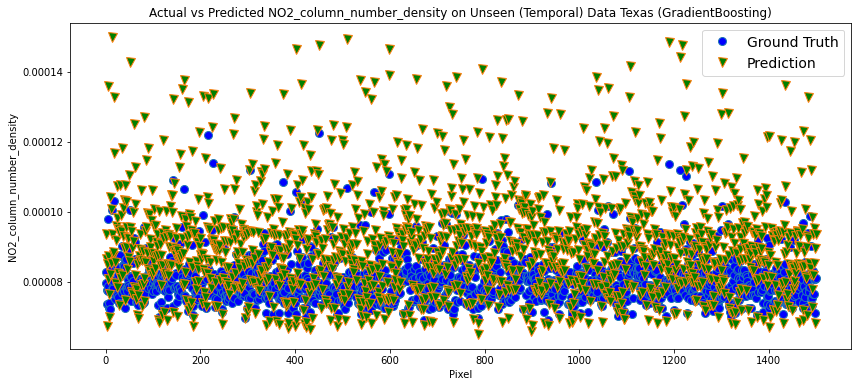

In [28]:
prediction_Texas=model.predict(X_test_Texas)
MSE=mean_squared_error(y_test_Texas,prediction_Texas)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Texas,prediction_Texas)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Texas,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Texas,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Texas (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

Mean Squared Error = 7.447519609586264e-10
Mean absolute percentage error = 0.28700957587531556


Text(0, 0.5, 'NO2_column_number_density')

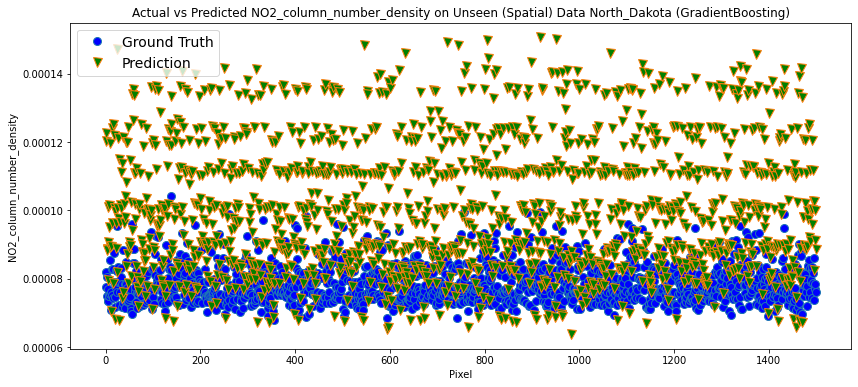

In [32]:
prediction_North_Dakota=model.predict(X_test_North_Dakota)
MSE=mean_squared_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_North_Dakota,prediction_North_Dakota)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_North_Dakota,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_North_Dakota,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data North_Dakota (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')

Mean Squared Error = 2.8146136620301246e-10
Mean absolute percentage error = 0.165192316795315


Text(0, 0.5, 'NO2_column_number_density')

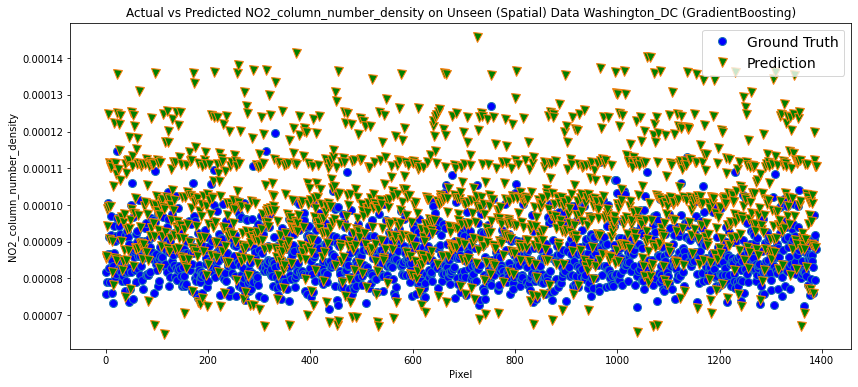

In [33]:
prediction_Washington_DC=model.predict(X_test_Washington_DC)
MSE=mean_squared_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean Squared Error =",MSE)

MAPE=mean_absolute_percentage_error(y_test_Washington_DC,prediction_Washington_DC)
print("Mean absolute percentage error =",MAPE)


fig = plt.figure(figsize=(14,6))
plt.plot(y_test_Washington_DC,marker="o", ms = 8, mfc = 'b', linestyle='None',label='Ground Truth')
plt.plot(prediction_Washington_DC,marker="v", ms = 9,linestyle='None', mfc = 'g',label='Prediction')
plt.title('Actual vs Predicted NO2_column_number_density on Unseen (Spatial) Data Washington_DC (GradientBoosting)')
plt.legend(loc='best',prop={'size':14})
plt.xlabel('Pixel')
plt.ylabel('NO2_column_number_density')